In [2]:
import warnings
warnings.simplefilter('ignore', category=FutureWarning)

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
import pydataset as pds

from env import host, user, password

In a jupyter notebook, classification_exercises.ipynb, use a python module (pydata or seaborn datasets) containing datasets as a source from the iris data. Create a pandas dataframe, df_iris, from this data.

In [ ]:
# Create a pandas dataframe from df_iris
df_iris = pds.data('iris')
df_iris.head()

In [ ]:
# print the first 3 rows of df_iris
print(df_iris.head(3))

In [ ]:
# print the column names of df_iris
print(df_iris.columns)

In [ ]:
# print the data type of each column 
print(df_iris.dtypes)

In [ ]:
# print the summary statistics for each of the numeric variables
print(df_iris.describe())

Read the Table1_CustDetails table from your spreadsheet exercises google sheet into a dataframe named df_google_sheets.

Make sure that the spreadsheet is publicly visible under your sharing settings.

In [ ]:
# imported Table1_CustDetails google spreadsheet as a dataframe
gs_url = 'https://docs.google.com/spreadsheets/d/1KsnXUx76_LWWQF_lSyfrQNikfUPX70D8GxlIBvj2pXs/export?format=csv'

df_google_sheet = pd.read_csv(gs_url)
df_google_sheet.head()

In [ ]:
# assign the first 100 rows to a new dataframe, df_google_sheets_sample
df_google_sheets_sample = df_google_sheet.head(100)

In [ ]:
# print the number of rows of your original dataframe
print(len(df_google_sheet))

In [ ]:
# print the first 5 column names
print(df_google_sheets_sample.columns[:5])

In [ ]:
# print the column names that have a data type of object
print(df_google_sheets_sample.select_dtypes(include=['object']).columns)

In [ ]:
# compute the range for each of the numeric variables.
print(df_google_sheets_sample.select_dtypes(include=['int64', 'float64']).max() - df_google_sheets_sample.select_dtypes(include=['int64', 'float64']).min())

Download your spreadsheet exercises google sheet as an excel file (File → Download → Microsoft Excel). Read the Table1_CustDetails worksheet into a dataframe named df_excel.

In [ ]:
# create a new dataframe named df_excel from workable_innis_spreadsheet_exercises.xlsx
df_excel = pd.read_excel('workable_innis_spreadsheet_exercises.xlsx')
df_excel.head()

In [ ]:
# assign the first 100 rows to a new dataframe, df_excel_sample
df_excel_sample = df_excel.head(100)
df_excel_sample

In [ ]:
# print the number of rows of your original dataframe
print(len(df_excel))

In [ ]:
# print the first 5 column names
print(df_excel_sample.columns[:5])

In [ ]:
# print the column names that have a data type of object
print(df_excel_sample.select_dtypes(include=['object']).columns)

In [ ]:
# compute the range for each of the numeric variables.
print(df_excel_sample.select_dtypes(include=['int64', 'float64']).max() - df_excel_sample.select_dtypes(include=['int64', 'float64']).min())

Read the data from this google sheet into a dataframe, df_google.
the data: https://docs.google.com/spreadsheets/d/1Uhtml8KY19LILuZsrDtlsHHDC9wuDGUSe8LTEwvdI5g/edit#gid=341089357

In [ ]:
url = 'https://docs.google.com/spreadsheets/d/1Uhtml8KY19LILuZsrDtlsHHDC9wuDGUSe8LTEwvdI5g/export?format=csv'
df_google = pd.read_csv(url)
df_google.head()

In [ ]:
# print the first 3 rows of df_google
print(df_google.head(3))

In [ ]:
# print the number of rows and columns of df_google
print(df_google.shape)

In [ ]:
# print the column names of df_google
print(df_google.columns)

In [ ]:
# print the data type of each column
print(df_google.dtypes)

In [ ]:
# print the summary statistics for each of the numeric variables
print(df_google.describe())

In [ ]:
# print the unique values for each of your categorical variables
print(df_google.select_dtypes(include=['object']).nunique())

DATA PREPARATION:
Exercises

The end product of this exercise should be the specified functions in a python script named prepare.py. Do these in your classification_exercises.ipynb first, then transfer to the prepare.py file.

This work should all be saved in your local classification-exercises repo. Then add, commit, and push your changes.

In [ ]:
# Using the Iris Data:
# Use the function defined in acquire.py to load the iris data.
# Drop the species_id and measurement_id columns.
# Rename the species_name column to just species.
# Create dummy variables of the species name and concatenate onto the iris dataframe. (This is for practice, we don't always have to encode the target, but if we used species as a feature, we would need to encode it).
# Create a function named prep_iris that accepts the untransformed iris data, and returns the data with the transformations above applied.

In [ ]:
import acquire

df = acquire.get_iris_data() # utlize acquire.py to load the iris data.

In [ ]:
def prep_iris(df): # create a function named prep_iris that accepts the untransformed iris data, and returns the data with the transformations above applied.
    df = acquire.get_iris_data() # utlize acquire.py to load the iris data.
    df = df.drop(columns=['species_id', 'Unnamed: 0']) # drop the species_id and measurement_id columns.
    df = df.rename(columns={'species_name': 'species'}) # rename the species_name column to just species.
    dummy_df = pd.get_dummies(df[['species']], drop_first=True) # create dummy variables of the species name and concatenate onto the iris dataframe. (This is for practice, we don't always have to encode the target, but if we used species as a feature, we would need to encode it).
    df = pd.concat([df, dummy_df], axis=1) # concatenate the iris dataframe with the dummy variables.
    return df.drop(columns=['species']) # drop the species column.

prep_iris(df) # call the function prep_iris to apply the transformations to the iris data.

In [ ]:
# Using the Titanic dataset:
# Use the function defined in acquire.py to load the Titanic data.
df = acquire.get_titanic_data()
df.head()

In [ ]:
# Drop any unnecessary, unhelpful, or duplicated columns.
df = df.drop(columns=['deck', 'embarked', 'class', 'age', 'passenger_id'])
# Encode the categorical columns. Create dummy variables of the categorical columns and concatenate them onto the dataframe.
dummy_df = pd.get_dummies(df, drop_first=True)

In [ ]:
# Create a function named prep_titanic that accepts the raw titanic data, and returns the data with the transformations above applied.
def prep_titanic(df):
    df = acquire.get_titanic_data()
    df = df.drop(columns=['deck', 'embarked', 'class', 'age', 'passenger_id', 'Unnamed: 0'])
    # fill in missing values
    df['embark_town'] = df.embark_town.fillna(value='Southampton')
    dummy_df = pd.get_dummies(df[['sex', 'embark_town']], drop_first=[True,True])
    df = pd.concat([df, dummy_df], axis=1)
    return df.drop(columns=['sex', 'embark_town'])

prep_titanic(df)


In [ ]:
# Using the Telco dataset
# Use the function defined in acquire.py to load the Telco data.
df = acquire.get_telco_data()
df.head()

Columns to drop ['Unnamed: 0', 'internet_service_type_id', 'payment_type_id', 'contract_type_id']

In [ ]:
# Drop any unnecessary, unhelpful, or duplicated columns. This could mean dropping foreign key columns but keeping the corresponding string values, for example.
df = df.drop(columns=['Unnamed: 0', 'internet_service_type_id', 'payment_type_id', 'contract_type_id'])

In [ ]:
# Encode the categorical columns. Create dummy variables of the categorical columns and concatenate them onto the dataframe.
dummy_df = pd.get_dummies(df, drop_first=True)

In [ ]:
# Create a function named prep_telco that accepts the raw telco data, and returns the data with the transformations above applied.
def prep_telco(df):
    df = acquire.get_telco_data()
    df = df.drop(columns=['Unnamed: 0', 'internet_service_type_id', 'payment_type_id', 'contract_type_id'])
    dummy_df = pd.get_dummies(df[['payment_type', 'contract_type', 'internet_service_type']], drop_first=True)
    df = pd.concat([df, dummy_df], axis=1)
    return df.drop(columns=['payment_type', 'contract_type', 'internet_service_type'])

prep_telco(df)
    

Section 1 - iris_db: Using iris data from our mySQL server and the methods used in the lesson above:

Acquire, prepare & split your data.

In [25]:
import prepare
# visualization
import matplotlib.pyplot as plt
import seaborn as sns
# statistical testing
from scipy import stats
# Acquire and prep iris data by pulling it from prepare.py
df = prepare.prep_iris(df)

Let me get that for you...


In [32]:
# split the iris data into training and testing sets
iris_train, iris_validate, iris_test = prepare.split_dataframe(df)
print(iris_train.shape, iris_validate.shape, iris_test.shape)


(84, 7) (36, 7) (30, 7)


Univariate Stats

For each measurement type (quantitative variable): create a histogram, boxplot, & compute descriptive statistics (using .describe()).

In [ ]:
# Get info about iris_train data
print(iris_train.describe().T)
print('-------------------------------------------')
print(iris_train.dtypes)

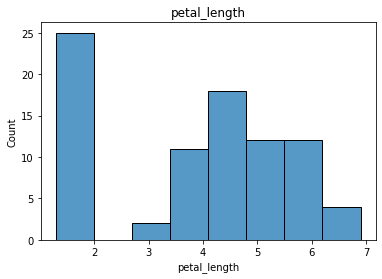

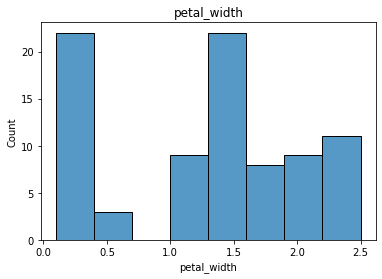

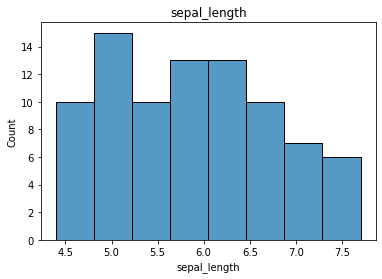

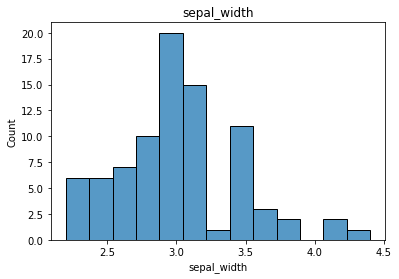

In [44]:
#For each measurement type (quantitative variable): create a histogram, boxplot, & compute descriptive statistics (using .describe()).
cat_vars = ['species']
quant_vars = ['petal_length', 'petal_width', 'sepal_length', 'sepal_width']
# create a histogram for each of quantitative varaibles
for var in quant_vars:
    plt.figure()
    sns.histplot(iris_train[var])
    plt.title(var)
    plt.show()

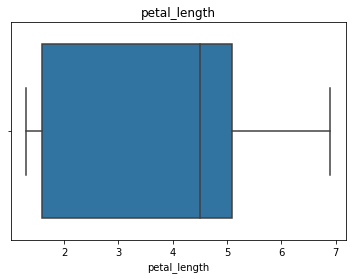

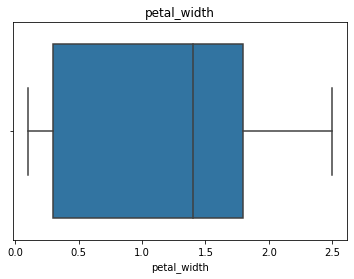

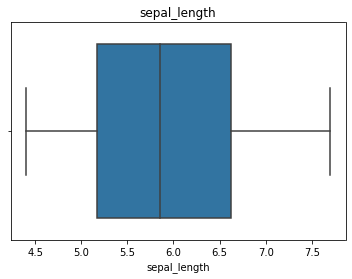

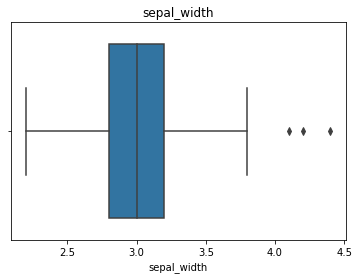

In [43]:
# Create a boxplot for each of the quantitative variables
for var in quant_vars:
    plt.show()
    sns.boxplot(iris_train[var])
    plt.title(var)
    plt.show()

For each species (categorical variable): create a frequency table and a bar plot of those frequencies.

versicolor    32
virginica     27
setosa        25
Name: species, dtype: int64


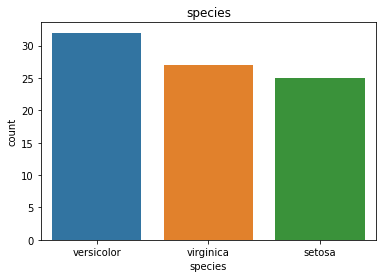

In [50]:
# create a frequency table for each of the categorical variables
print(iris_train.species.value_counts())
for var in cat_vars:
    plt.figure()
    sns.countplot(iris_train[var])
    plt.title(var)
    plt.show()

versicolor    32
virginica     27
setosa        25
Name: species, dtype: int64


Document takeaways & any actions.

Bivariate Stats

Visualize each measurement type (y-axis) with the species variable (x-axis) using barplots, adding a horizontal line showing the overall mean of the metric (y-axis).